In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

from scipy.interpolate import interp1d
from scipy.stats.mstats import winsorize

warnings.filterwarnings("ignore")

In [2]:
states=pd.read_csv("C:\\Users\\Gunesim\\Desktop\\Ödevler\\states_all.csv", engine="python", encoding="utf8", index_col=0)

1NCİ SORU:

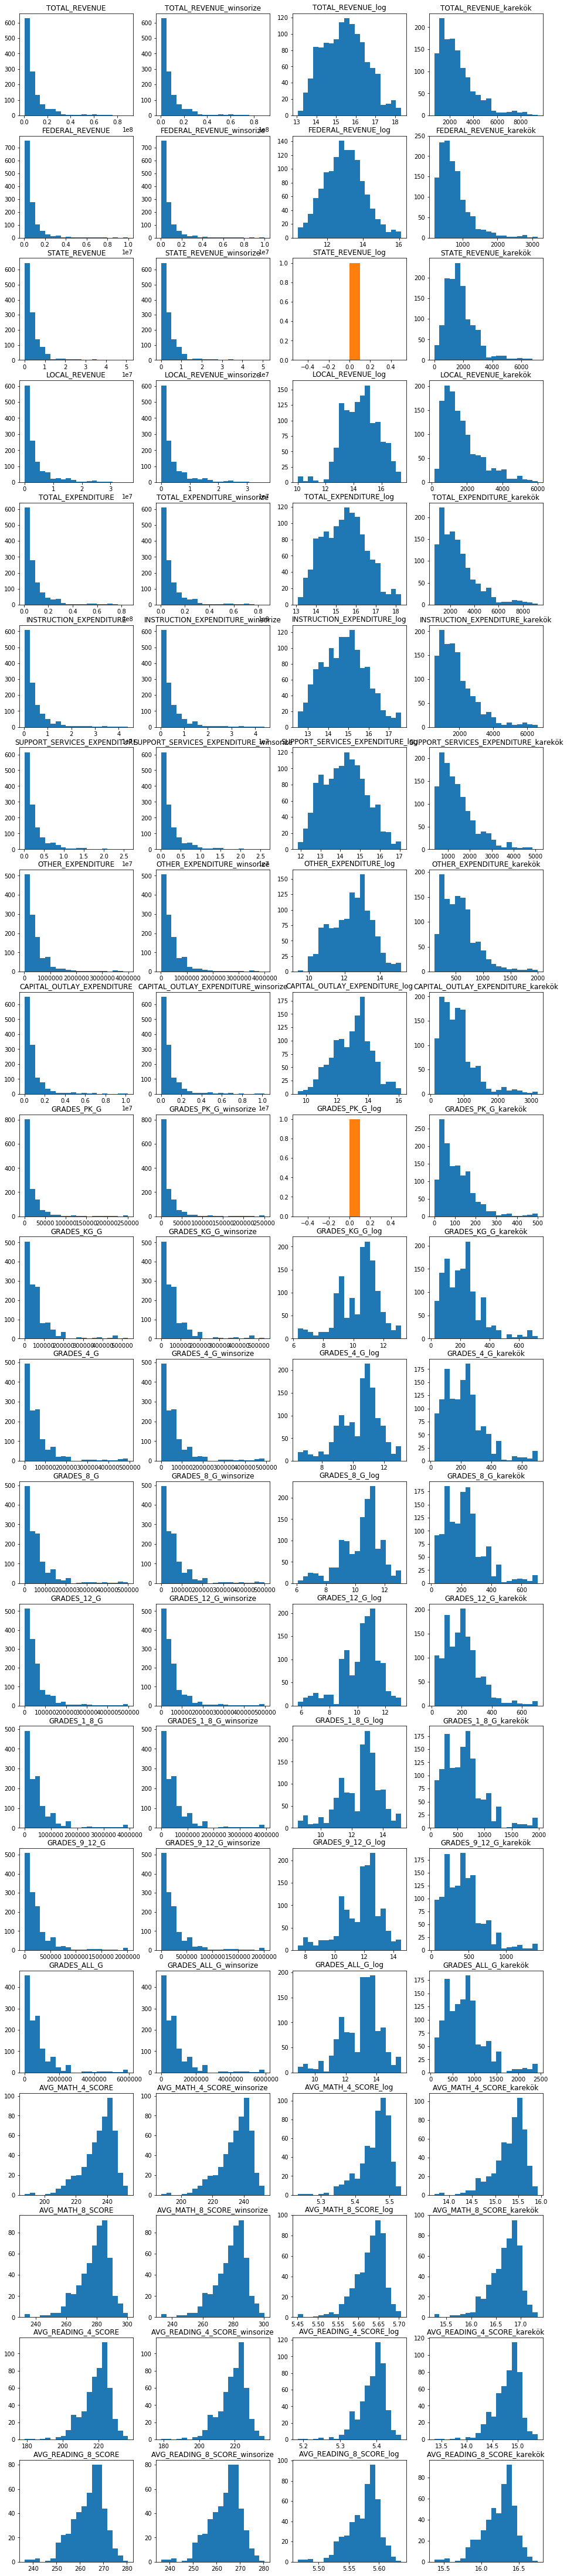

In [3]:
plt.figure(figsize=(16,80))

for i in range(3, len(states.columns)):
    
    plt.subplot(len(states.columns)-3, 4, 4*i-11)
    try:
        plt.hist(states[states.columns[i]], bins=20)
    except:
        plt.hist(0)
    plt.title(states.columns[i])
        
    plt.subplot(len(states.columns)-3, 4, 4*i-10)
    try:
        plt.hist(winsorize(states[states.columns[i]]), bins=20)
    except:
        plt.hist(0)
    plt.title(states.columns[i]+"_winsorize")
    
    plt.subplot(len(states.columns)-3, 4, 4*i-9)
    try:
        plt.hist(np.log(states[states.columns[i]]), bins=20)
    except:
        plt.hist(0)
    plt.title(states.columns[i]+"_log")
    
    plt.subplot(len(states.columns)-3, 4, 4*i-8)
    try:
        plt.hist(np.sqrt(states[states.columns[i]]), bins=20)
    except:
        plt.hist(0)
    plt.title(states.columns[i]+"_karekök")
    
plt.show()

    a. İki sutunda 0 (sıfır) olduğu için, bu verilerin logaritmik dönüşümlü histogramı çizilemedi. (Bu verilerdeki sıfır değerleri doldurulmak yerine verilerin karekökü alınarak etkisi azaltılmıştır.)
    
    b. Veriler genel olarak (matematik ve okuma notları hariç) normal dağılıma uymaktadır. Veriler sola çarpıktır. Bu çarpıklığın harcama tablolarında biraz daha arttığı görülmektedir.
    
    c. Matematik ve okuma verilerinde yoğunluk genellikle 2 not üzerinde yoğunlaşmaktadır. Bu verilerde ortalama ve medyan değerinin sağa kaydığı görülmektedir.
    
    ç. Yerel Kazanç değerlerinde bazı değerlerin diğerlerinden çok düşük olması, bazı bölgelerin diğerlerinden çok geri kalmış olduğunu düşünüdürmektedir.
    
    d. Masraf tablolarına bakıldığında genellikle birbirine yakın değerlerin olması, buna karşılık kazanç tablolarının masrafla uyumlu olmaması; bazı bölgelerde yapılan masrafların yeterince verimli olmadığını düşündürmektedir.
    
    e. Genel not değerlerinin (GRADES 4, 8, 12...) bazı bölgelerde çok iyi olduğu, bazı bölgelerde ise çok düşük olduğu görülmektedir. İki farklı yığılma noktası mevcuttur. Aradaki bu farkların, ilgili bölgelerin kişi başı gelirleri ile orantılı olabileceğini düşündürmektedir. Bölgelere ait kişi başına düşen gelir verileri elde edilebilirse, bu verilerle de analiz yapılması faydalı olabilir.

2NCİ SORU:

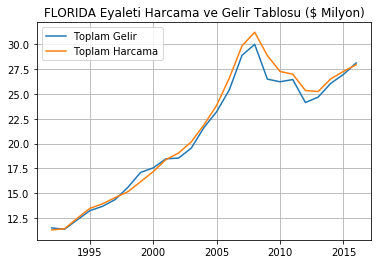

In [4]:
eyalet="FLORIDA"

plt.plot(states["YEAR"].unique(), states.loc[states["STATE"]==eyalet]["TOTAL_REVENUE"]/1000000)
plt.plot(states["YEAR"].unique(), states.loc[states["STATE"]==eyalet]["TOTAL_EXPENDITURE"]/1000000)
plt.title("{} Eyaleti Harcama ve Gelir Tablosu ($ Milyon)".format(eyalet))
plt.legend(["Toplam Gelir", "Toplam Harcama"])
plt.grid()

plt.show()

Florida Eyaleti'nin harcamaları ve gelirleri genel itibariyle uyumludur. Bu mali kalemler, 1993 yılından  2008 yılına kadar düzenli olarak artmıştır.

Muhtemelen 2008 yılında yaşanan ekonomik kriz neticesinde, harcamalar ve gelirler düşme eğilimine girmiş ve 2005 yılı seviyelerine gerilemiştir. Ancak; harcamalar gelirin üzerinde seyretmiştir. Bir miktar bütçe açığı oluşmuştur.

2012 - 2013 yıllarından itibaren, gelirler artmaya başlamış ve  bütçe açık bir ölçüde kapatıldıktan sonra harcamlar da artırılmaya başlanmıştır.

Gelir ve harcamalar şu anda 2006 yılı seviyelerindedir. Gelir ve harcamaların artış hızı yavaşlamıştır.

3NCÜ ve 4NCÜ SORULAR:

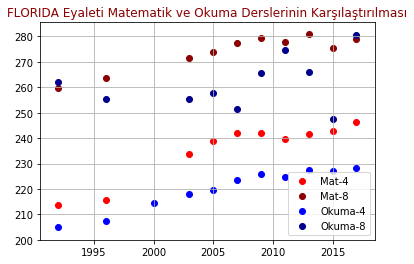

In [5]:
eyalet="FLORIDA"

plt.scatter(states["YEAR"].unique(), states.loc[states["STATE"]==eyalet]["AVG_MATH_4_SCORE"], color="red")
plt.scatter(states["YEAR"].unique(), states.loc[states["STATE"]==eyalet]["AVG_MATH_8_SCORE"], color="darkred")

plt.scatter(states["YEAR"].unique(), states.loc[states["STATE"]==eyalet]["AVG_READING_4_SCORE"], color="blue")
plt.scatter(states["YEAR"].unique(), states.loc[states["STATE"]==eyalet]["AVG_READING_8_SCORE"], color="darkblue")

plt.title("{} Eyaleti Matematik ve Okuma Derslerinin Karşılaştırılması".format(eyalet), color="darkred")
plt.legend(["Mat-4", "Mat-8", "Okuma-4", "Okuma-8"])
plt.grid()

plt.show()

Florida Eyaleti'ndeki öğrenciler genel olarak Matematik dersinde başarılıdırlar ve yıllara sari olarak her dersin başaarısı kendi içinde yükselme eğilimindedir. Ayrıca, 2008 ekonomik krizi nedeniyle eğitim harcamalarının azalmasının sonucu olarak ders başarılarında küçük çaplı bir düşüş söz konusudur.

Bu tabloda 8nci sınıfların okuma başarılarında bir düzensizlik göze çarpmaktadır ve ekonomik kriz sürecinde ters yönde hareket ettiği görülmektedir.

5NCİ SORU:

In [6]:
#Sütunların enterpolasyonlu değerleri
M_4_ent=[213.6897512, 214.208209, 214.7266669, 215.2451248, 215.7635826, 218.3300439, 220.8965052, 223.4629664, 226.0294277, 
         228.5958889, 231.1623502, 233.7288115, 236.3297305, 238.9306496, 240.4754498, 242.02025, 241.9825797, 241.9449094, 
         240.8856802, 239.826451, 240.7511303, 241.6758096, 242.1700652, 242.6643209, 244.5160084, 246.3676958]
M_8_ent=[259.9088482, 260.8414845, 261.7741209, 262.7067572, 263.6393936, 264.7439788, 265.8485641, 266.9531493, 268.0577345, 
         269.1623198, 270.266905, 271.3714902, 272.7099336, 274.0483769, 275.7159371, 277.3834973, 278.3593807, 279.3352641, 
         278.5861497, 277.8370352, 279.3464374, 280.8558396, 278.0898288, 275.323818, 277.2221166, 279.1204152]
R_4_ent=[204.8826063, 205.4863571, 206.0901079, 206.6938586, 207.2976094, 209.0743564, 210.8511035, 212.6278505, 214.4045976, 
         215.6078944, 216.8111913, 218.0144882, 218.7398552, 219.4652222, 221.5000745, 223.5349268, 224.6041671, 225.6734073, 
         225.1009964, 224.5285854, 225.995881, 227.4631766, 227.3260728, 227.188969, 227.7307955, 228.2726221]
R_8_ent=[262.1189861, 260.3958982, 258.6728104, 256.9497226, 255.2266348, 255.2399891, 255.2533435, 255.2666978, 255.2800522, 
         255.2934065, 255.3067609, 255.3201152, 256.5059235, 257.6917319, 254.4897617, 251.2877915, 258.4004557, 265.5131199, 
         270.0972597, 274.6813995, 270.3331905, 265.9849815, 256.8192132, 247.6534449, 264.0762875, 280.49913]

sutunlar=[M_4_ent, M_8_ent, R_4_ent, R_8_ent]
baslik=["Matematik-4 Dersi", "Matematik-8 Dersi", "Okuma-4 Dersi", "Okuma-8 Dersi"]

sutun=states.columns[20:24]
eyalet="FLORIDA"

for i in range(len(sutun)):
    #Ortalama ile doldurulmuş sütun oluşturma
    states[sutun[i]+"_mean"]=states[sutun[i]]
    states[sutun[i]+"_mean"].fillna(states[sutun[i]][states["STATE"]==eyalet].mean(), inplace=True)
    
    #Medyan ile doldurulmuş sütun oluşturma
    states[sutun[i]+"_median"]=states[sutun[i]]
    states[sutun[i]+"_median"].fillna(states[sutun[i]][states["STATE"]==eyalet].median(), inplace=True)

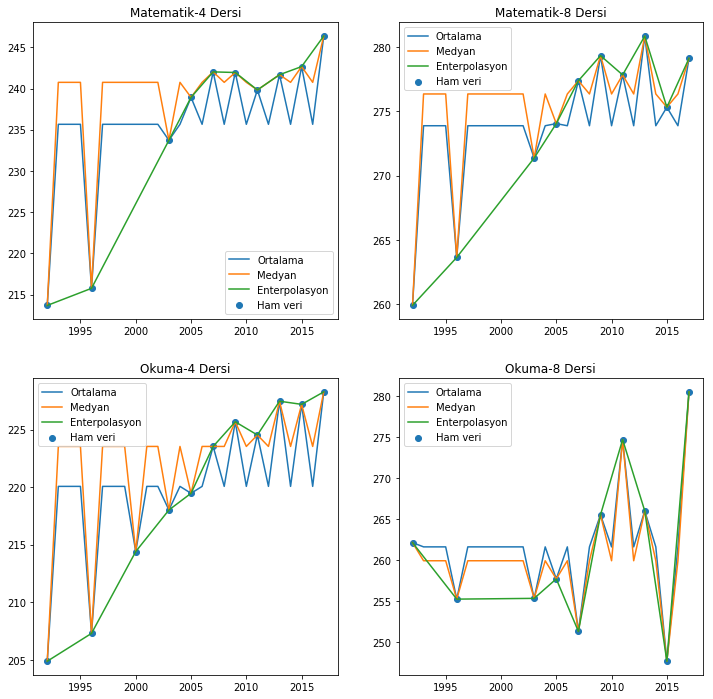

In [7]:
plt.figure(figsize=(12, 12))

for i in range(4):
    plt.subplot(2,2,1+i)
    plt.scatter(states["YEAR"].unique(), states[states.columns[20+i]][states["STATE"]==eyalet])
    plt.plot(states["YEAR"].unique(), states[states.columns[24+i*2]][states["STATE"]==eyalet])
    plt.plot(states["YEAR"].unique(), states[states.columns[25+i*2]][states["STATE"]==eyalet])
    plt.plot(states["YEAR"].unique(), sutunlar[i])
    plt.legend(["Ortalama", "Medyan", "Enterpolasyon", "Ham veri"])
    plt.title(baslik[i])

Boş değerleri ortalama ve medyan değerleri ile doldurmak, bu veri setimizde iyi bir sonuç vermedi. Veri setimizdeki gibi belirli bir trend izleyen değerler için enterpolasyon tekniği daha uygun duşmektedir. Ancak, veriler trend izlemek yerine rastgele bir dağılım sergileseydi, bu durumda ortalama ve medyan değerleri daha uygun olabilirdi. Ancak, hangisinin daha uygun olacağı veri setine bağlı olarak değişebilir.